# Clasificación por Arboles de Decisión (ejemplo 2)

## Los datos

Se utilizará otro conjunto de datos bastante conocido, el de "Palmer Penguins", ya que es lo suficientemente simple para permitir conocer cómo el modificar los hiperparámetros pueden cambiar los resultados de clasificación.


<img src="penguin.jpg" style="max-width:400px">

Estos datos fueron recopilados, y hechos disponibles, por la Dra. Kristen Gorman y la estación Palmer, Antártica LTER, un miembro de la Long Term Ecological Research Network (LTER).

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Resumen:
Hay dos archivos CSV.  Para cursos introductorios, probablemente es mejor el (penguins_size.csv).

* penguins_size.csv: Datos simplificados del los conjuntos de datos originales de pinguinos.  Contiene las variables:

    * species: especie de pinguino (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: longitud del culmen (mm)
    * culmen_depth_mm: profundidad del culmen (mm)
    * flipper_length_mm: longitud de aleta (mm)
    * body_mass_g: masa del cuerpo (g)
    * island: nombre de la isla (Dream, Torgersen, or Biscoe) en el archipiélago Palmer (Antárctica)
    * sex: sexo del pinguino  

Nota: El culmen es la orilla superior del pico del un pájaro

**La meta es crear un modelo que pueda ayudar a predecir la especie de un pinguino basado en los atributos físicos, luego se puede utilizar ese modelo para ayudar a los investigadores a clasificar los pinguinos en el campo, en vez de tener que contar con un biólogo experimentado**

## Importaciones

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("penguins_size.csv")

In [63]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Análisis exploratorio de datos (EDA)

### Datos Faltantes

Recordar que el propósito es crear un modelo para uso futuro, así que aquellas observaciones a las que les falta información crucial no serán de ayuda para esta tarea.  Esto es cierto especialmente porque para observaciones futuras se asume que las investigaciones podrán captar toda la información relevante.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [65]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

¿Si eliminamos estos casos, qué porcentaje del total representa?

In [66]:
100*(10/344)

2.9069767441860463

In [67]:
df = df.dropna()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [69]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [70]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [71]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [72]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [73]:
df[df['species'] == 'Gentoo'].groupby('sex').describe()

culmen_length_mm                                                        \
                  count       mean       std   min    25%   50%     75%   max   
sex                                                                             
.                   1.0  44.500000       NaN  44.5  44.50  44.5  44.500  44.5   
FEMALE             58.0  45.563793  2.051247  40.9  43.85  45.5  46.875  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.10  49.5  50.500  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
.                  1.0  15.700000  ...             217.0  217.0         1.0   
FEMALE            58.0  14.237931  ...             215.0  222.0        58.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                                      
.       4875.000000         NaN  4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  4679.741379  281.578294  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    5484.836066  313.158596  4750.0  5300.0  5500.0  5700.0  6300.0  

[3 rows x 32 columns]

In [74]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

Comparando los diferentes atributos, podríamos pensar que este caso es de sexo femenino.  El cambio es más fácil usando el método "at" de Pandas

In [75]:
df.at[336, 'sex'] = 'FEMALE'

In [76]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

Si no tuviéramos la seguridad necesaria, podríamos simplemente ejecutar la siguiente instrucción 

In [77]:
#df = df[df['sex'] != '.']

## Visualización

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

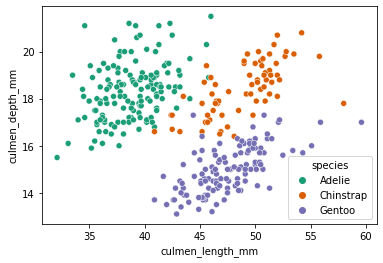

In [78]:
sns.scatterplot(x = 'culmen_length_mm', 
                y = 'culmen_depth_mm',
                data = df,
                hue = 'species',
                palette = 'Dark2')

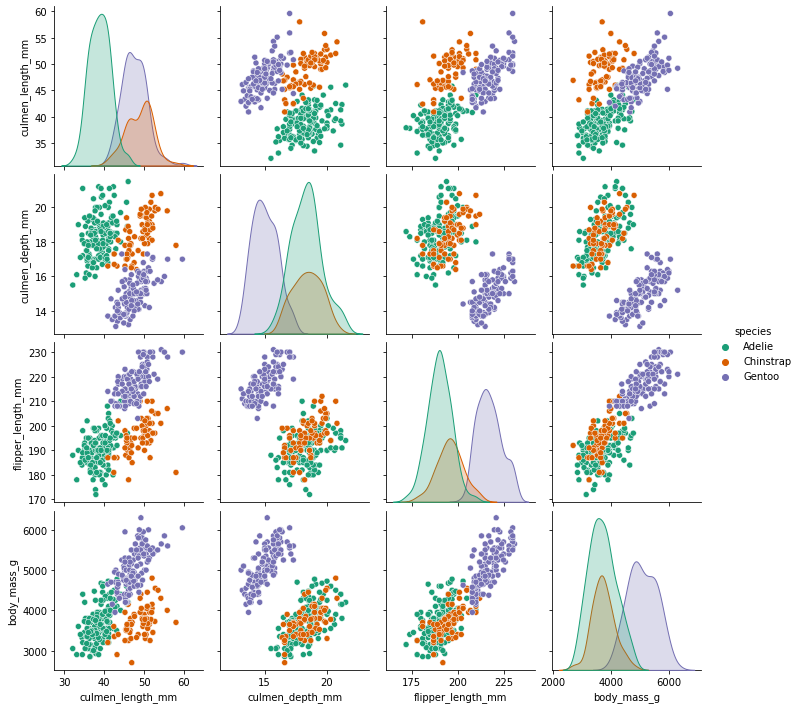

In [79]:
sns.pairplot(df, hue = 'species', palette = 'Dark2')

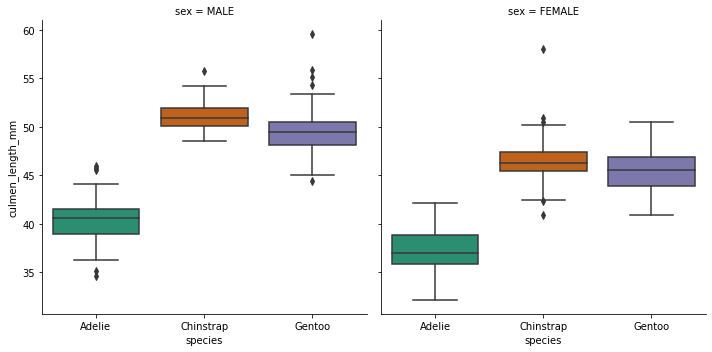

In [80]:
sns.catplot(x = 'species', 
            y = 'culmen_length_mm',
            data = df, 
            kind = 'box',
            col = 'sex',
            palette = 'Dark2')

## Ingeniería de Atributos (Feature Engineering)

Aunque la gente de Sklearn está trabajando con variables categóricas, tal cuál, aún no está disponible.  Por lo tanto es necesario codifiarlas.  Las siguientes dos líneas son solo para probar, no se cambia nada

In [81]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [82]:
pd.get_dummies(df.drop('species', axis = 1), drop_first = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## División Entrenamiento | Prueba

In [83]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.3, random_state=101)

**NOTA**  Como en este algoritmo solo se trata de ver si una observación pertenece a una clase, o no, no es necesario normalizar las variables

# Clasificador por Arbol de Decisión

## Hiperparámeteros por default

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
modelo = DecisionTreeClassifier()

In [88]:
modelo.fit(X_entreno, y_entreno)

DecisionTreeClassifier()

In [89]:
y_predicciones = modelo.predict(X_prueba)

## Evaluación

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (d:\Archivos de programa\Python\3.10\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
confusion_matrix(y_prueba, y_predicciones)

In [ ]:
plot_confusion_matrix(modelo, X_prueba, y_prueba)

In [ ]:
print(classification_report(y_prueba, y_predicciones))

In [ ]:
modelo.feature_importances_

In [ ]:
pd.DataFrame(index = X.columns, data = modelo.feature_importances_, 
             columns=['Importancia_Atributos']).sort_values('Importancia_Atributos')

In [ ]:
sns.boxplot(x = 'species', y = 'body_mass_g', data = df)

## Visualizar el Arbol

Esta función es bastante reciente, puede que quiera revisar los documentos en-línea:

Documentación en-línea: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize = (12, 8))
plot_tree(modelo);

In [ ]:
plt.figure(figsize = (12, 8), dpi = 150)
plot_tree(modelo, filled = True, feature_names = X.columns);

## Reportando los Resultados del Modelo

Para empezar a experimentar con hiperparámetros, se crea una función que reporta el resultado de la clasificación y grafica el árbol.

In [ ]:
def reporte_modelo(modelo):
    modelo_predicciones = modelo.predict(X_prueba)
    print(classification_report(y_prueba,modelo_predicciones))
    print('\n')
    plt.figure(figsize = (12, 8), dpi = 150)
    plot_tree(modelo, filled = True, feature_names = X.columns);

## Entendiendo los Hiperparámeteros

### Profundidad Máxima (Max Depth)

In [ ]:
#help(DecisionTreeClassifier)

In [ ]:
arbol_podado = DecisionTreeClassifier(max_depth = 2)
arbol_podado.fit(X_entreno, y_entreno)

In [ ]:
reporte_modelo(arbol_podado)

## Número Máximo de Nodos Hoja (Max Leaf Nodes)

In [ ]:
arbol_max_hojas = DecisionTreeClassifier(max_leaf_nodes = 3)
arbol_max_hojas.fit(X_entreno, y_entreno)

In [ ]:
reporte_modelo(arbol_max_hojas)

## Criterio (Criterion)

In [ ]:
arbol_entropia = DecisionTreeClassifier(criterion = 'entropy')
arbol_entropia.fit(X_entreno, y_entreno)

In [ ]:
reporte_modelo(arbol_podado)

---